In [2]:
from musical.theory.note import Note
from musical.audio.playback import play
from musical.audio import source

import matplotlib.pyplot as plt
import plotly.express as px

from collections import defaultdict

In [3]:
g3 = Note('G3')

# Tutorial on how to make your own class

Covered topics:

* Class methods
* Class constructor
* Class attributes

In [40]:
# How to write a function
def scream(how_loud):
    volume = "A"*how_loud
    return f"SCRE{volume}M!"

# How to write a class
class Person(object):
    def __init__(self, name, height):
        self.name = name
        self.height = height
    
    def greet(self, another_person):
        print(f"{self.name} says hi to {another_person.name}")

    def convert_height_to_feet_only(self):
        tokens = self.height.split("'")
        height_feet = float(tokens[0])
        height_inches = float(tokens[1])

        return height_feet + height_inches / 12
        
    def __gt__(self, another_person):
        return self.convert_height_to_feet_only() > another_person.convert_height_to_feet_only()

    def __lt__(self, another_person):
        return self.convert_height_to_feet_only() < another_person.convert_height_to_feet_only()
        

In [41]:
scream(10)

'SCREAAAAAAAAAAM!'

In [45]:
mike = Person(name="Mike", height="6'2''")
ricky = Person(name='Ricky', height="7'6''")

print("Is Mike greater than ricky? Result: ", mike > ricky)

mike.height = "12'10''"
print("Is Mike greater than Ricky? Result:", mike > ricky)
mike.greet(ricky)


Is Mike greater than ricky? Result:  False
Is Mike greater than Ricky? Result: True
Mike says hi to Ricky


AttributeError: 'str' object has no attribute 'name'

In [16]:
print(mike.height)

6'2''


In [17]:
print(mike.name)

Mike


In [4]:
class Hit:

    ''' Rough draft of Hit class. Stores information about the hit and generates
            the audio array accordingly. Currently implements a basic cache to avoid
            having to rerender identical hits
    '''

    cache = {}

    def __init__(self, note, length):
        self.note = note
        self.length = length

    def render(self):
        # Render hit of "key" for "length" amound of seconds
        # XXX: Currently only uses a string pluck
        key = (str(self.note), self.length)
        print(hex(id(Hit.cache)))
        if key not in Hit.cache:
            print()
            Hit.cache[key] = source.pluck(self.note, self.length)
        return Hit.cache[key]


In [21]:
hit_reg = Hit(g3, 1)

0x7f3b07de8840



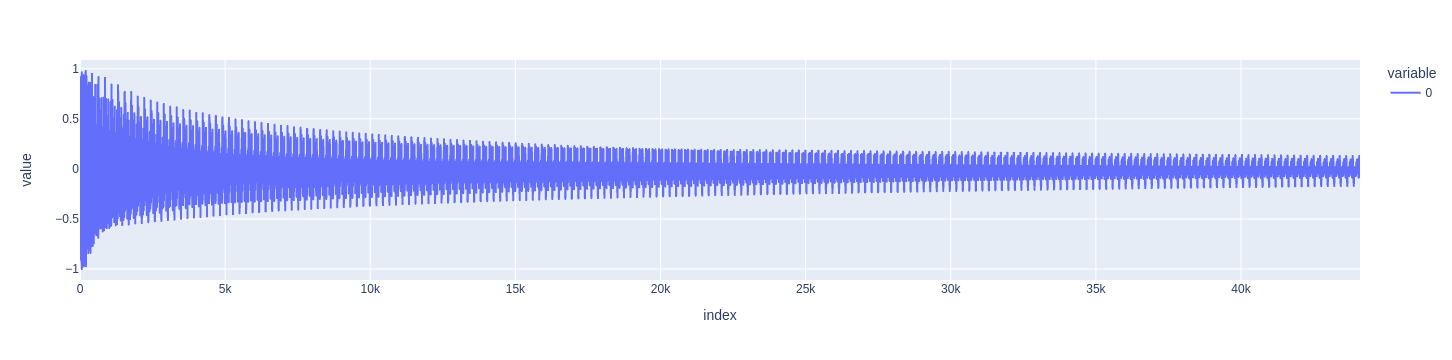

In [22]:
# This is the actual wave-form of the sound. It is exactly one second of audio.
px.line(hit_reg.render())

In [27]:
px.line(hit_dev.render(rate=10, decay=0.998))

0x7f3b0d84f3c0


IndexError: index 10 is out of bounds for axis 0 with size 10

In [28]:
play(hit_reg.render())

0x7f3b07de8840


In [36]:
play(hit_dev.render(rate=100, decay=10))

0x7f3b0d84f3c0
